**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [14]:
%%pycodestyle
import scipy.spatial
from scipy import stats


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X = np.asarray(X)
            self.y = np.asarray(y)
        else:
            self.tree = KDTree(X)
            self.y = np.asarray(y)

    def predict(self, X):
        if self.algorithm == 'brute':
            dist = scipy.spatial.distance.cdist(X, self.X, 'euclidean')
            ind = np.argpartition(dist, self.n_neighbors)[:, :self.n_neighbors]
        else:
            ind = self.tree.query(X, k=self.n_neighbors,
                                  return_distance=False, sort_results=False)
        return stats.mode(self.y[ind], axis=1)[0].reshape(1, -1)[0]

    def predict_proba(self, X):
        n_max = self.y.max() + 1
        proba = np.zeros((len(X), n_max))
        if self.algorithm == 'brute':
            dist = scipy.spatial.distance.cdist(X, self.X, 'euclidean')
            ind = np.argpartition(dist, self.n_neighbors)[:, :self.n_neighbors]
        else:
            ind = self.tree.query(X, k=self.n_neighbors,
                                  return_distance=False, sort_results=False)
        classes = self.y[ind]
        for i in range(len(classes)):
            a = np.bincount(classes[i])
            proba[i] = np.concatenate((a, np.zeros(n_max - len(a))), axis=0)
        return proba / self.n_neighbors

    def score(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)

**IRIS**

In [106]:
iris = datasets.load_iris()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [108]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [109]:
%time clf.fit(X_train, y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.38 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [110]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 35 µs


In [111]:
%time clf.predict(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 10.2 ms


array([0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1])

In [112]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 717 µs


array([0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1])

In [113]:
%time clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.42 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [114]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.18 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [115]:
clf.score(X_test, y_test)

1.0

In [116]:
my_clf.score(X_test, y_test)

1.0

Задание 3

In [141]:
n_neighbours = []
for i in range(2,100):
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    n_neighbours.append([i,my_clf.score(X_test, y_test)])

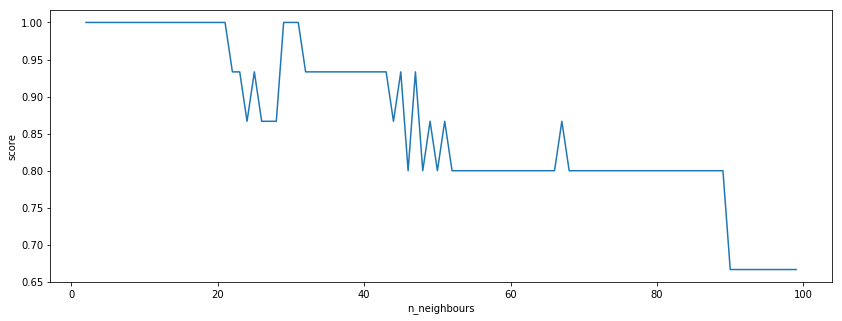

In [145]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('n_neighbours')
ax1.set_ylabel('score')
sns.lineplot(np.asarray(n_neighbours)[:,0],np.asarray(n_neighbours)[:,1])



**MNIST**

In [488]:
#mnist = fetch_mldata('MNIST original')

In [28]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)

In [30]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [31]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.23 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [32]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25.7 µs


In [60]:
%time clf.predict(X_test)

CPU times: user 2.5 s, sys: 0 ns, total: 2.5 s
Wall time: 2.5 s


array([4, 8, 2, 6, 0, 6, 4, 6, 9, 4, 0, 2, 5, 4, 2, 9, 9, 2, 3, 0, 5, 6,
       3, 7, 1, 6, 3, 6, 1, 2, 2, 5, 0, 0, 1, 6, 1, 7, 5, 1, 4, 5, 3, 4,
       7, 9, 3, 6, 3, 3, 9, 4, 9, 5, 3, 1, 0, 0, 7, 5, 8, 7, 3, 9, 0, 4,
       8, 3, 1, 6, 4, 7, 5, 4, 8, 2, 1, 2, 2, 3, 9, 2, 5, 7, 0, 1, 9, 8,
       7, 6, 2, 1, 5, 1, 3, 0, 1, 2, 7, 9], dtype=uint8)

In [61]:
%time my_clf.predict(X_test)

CPU times: user 1.96 s, sys: 0 ns, total: 1.96 s
Wall time: 1.96 s


array([4, 8, 2, 6, 0, 6, 4, 6, 9, 4, 0, 2, 5, 4, 2, 9, 9, 2, 3, 0, 5, 6,
       3, 7, 1, 6, 3, 6, 1, 2, 2, 5, 0, 0, 1, 6, 1, 7, 5, 1, 4, 5, 3, 4,
       7, 9, 3, 6, 3, 3, 9, 4, 9, 5, 3, 1, 0, 0, 7, 5, 8, 7, 3, 9, 0, 4,
       8, 3, 1, 6, 4, 7, 5, 4, 8, 2, 1, 2, 2, 3, 9, 2, 5, 7, 0, 1, 9, 8,
       7, 6, 2, 1, 5, 1, 3, 0, 1, 2, 7, 9], dtype=uint8)

In [62]:
%time clf.predict_proba(X_test)

CPU times: user 2.48 s, sys: 4 ms, total: 2.48 s
Wall time: 2.5 s


array([[0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. 

In [63]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.96 s, sys: 0 ns, total: 1.96 s
Wall time: 1.96 s


array([[0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. 

In [43]:
clf.score(X_test, y_test)

0.94

In [44]:
my_clf.score(X_test, y_test)

0.94

Задание 4

In [50]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)

In [52]:
%time clf.fit(X_train, y_train)

CPU times: user 1.16 s, sys: 44 ms, total: 1.2 s
Wall time: 1.2 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [53]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.1 s, sys: 48 ms, total: 1.15 s
Wall time: 1.15 s


In [54]:
%time clf.predict(X_test)

CPU times: user 2.44 s, sys: 0 ns, total: 2.44 s
Wall time: 2.45 s


array([4, 8, 2, 6, 0, 6, 4, 6, 9, 4, 0, 2, 5, 4, 2, 9, 9, 2, 3, 0, 5, 6,
       3, 7, 1, 6, 3, 6, 1, 2, 2, 5, 0, 0, 1, 6, 1, 7, 5, 1, 4, 5, 3, 4,
       7, 9, 3, 6, 3, 3, 9, 4, 9, 5, 3, 1, 0, 0, 7, 5, 8, 7, 3, 9, 0, 4,
       8, 3, 1, 6, 4, 7, 5, 4, 8, 2, 1, 2, 2, 3, 9, 2, 5, 7, 0, 1, 9, 8,
       7, 6, 2, 1, 5, 1, 3, 0, 1, 2, 7, 9], dtype=uint8)

In [55]:
%time my_clf.predict(X_test)

CPU times: user 2.06 s, sys: 0 ns, total: 2.06 s
Wall time: 2.08 s


array([4, 8, 2, 6, 0, 6, 4, 6, 9, 4, 0, 2, 5, 4, 2, 9, 9, 2, 3, 0, 5, 6,
       3, 7, 1, 6, 3, 6, 1, 2, 2, 5, 0, 0, 1, 6, 1, 7, 5, 1, 4, 5, 3, 4,
       7, 9, 3, 6, 3, 3, 9, 4, 9, 5, 3, 1, 0, 0, 7, 5, 8, 7, 3, 9, 0, 4,
       8, 3, 1, 6, 4, 7, 5, 4, 8, 2, 1, 2, 2, 3, 9, 2, 5, 7, 0, 1, 9, 8,
       7, 6, 2, 1, 5, 1, 3, 0, 1, 2, 7, 9], dtype=uint8)

In [56]:
%time clf.predict_proba(X_test)

CPU times: user 2.45 s, sys: 4 ms, total: 2.46 s
Wall time: 2.46 s


array([[0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. 

In [57]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.94 s, sys: 0 ns, total: 1.94 s
Wall time: 1.96 s


array([[0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. 

In [58]:
clf.score(X_test, y_test)

0.92

In [59]:
my_clf.score(X_test, y_test)

0.92

Задание 5

In [ ]:
# seaborn - визуализация данных
# matplotlib - визуализация данных
# train_test_split - разделение даннах на трейн и тест для кросс валидации
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - создание очереди выполнения функций(как конвеер)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормализация данных к диапазону [-1,1]
# ClassifierMixin - объединение предсказаний  разных моделей
# NeighborsBase - базовый класс для алгоритмов, основанных на методе ближайших соседей
# KNeighborsMixin  - позволяет совмещать разные методы kneighbors
# SupervisedIntegerMixin - проверке типов, а затем вызов метода fit NeighborsBase